In [2]:
from qiskit import *
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram
from qiskit import Aer

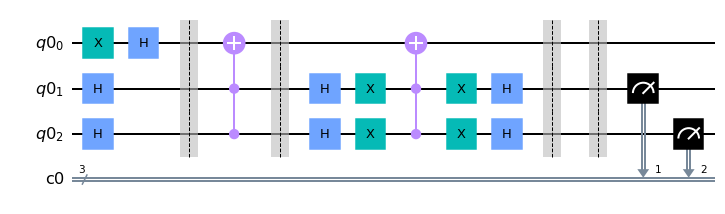

In [3]:
#Exemplo
Q = QuantumRegister(3)
C = ClassicalRegister(3)
circuito = QuantumCircuit(Q, C)

circuito.x(Q[0])
circuito.h(Q)
circuito.barrier()

for k in range(1):
    circuito.ccx(Q[2], Q[1], Q[0])
    circuito.barrier()
    circuito.h(Q[1])
    circuito.h(Q[2])
    circuito.x(Q[1])
    circuito.x(Q[2])
    circuito.ccx(Q[2], Q[1], Q[0])
    circuito.x(Q[1])
    circuito.x(Q[2])
    circuito.h(Q[1])
    circuito.h(Q[2])
    circuito.barrier()

circuito.barrier()
circuito.measure(Q[1], C[1])
circuito.measure(Q[2], C[2])

circuito.draw(output='mpl')

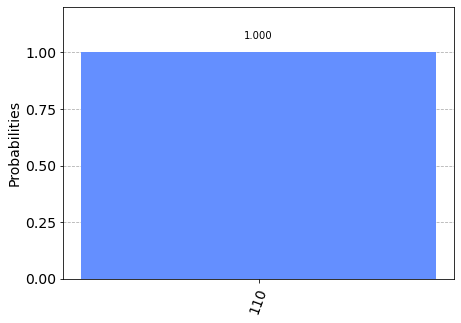

In [3]:
simulador = BasicAer.get_backend('qasm_simulator')
job = execute(circuito, simulador, shots=8024)
resultado = job.result()
contagem = resultado.get_counts()
plot_histogram(contagem)

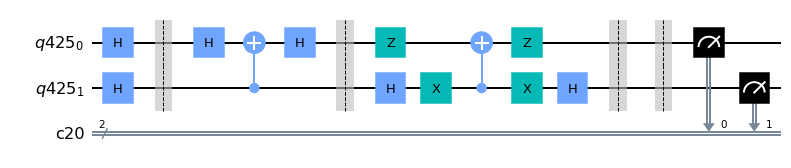

In [40]:
#Exemplo reduzido
Q = QuantumRegister(2)
C = ClassicalRegister(2)
circuito = QuantumCircuit(Q, C)

circuito.h(Q)
circuito.barrier()

for k in range(1):
    circuito.h(Q[0])
    circuito.cx(Q[1], Q[0])
    circuito.h(Q[0])
    circuito.barrier()
    circuito.h(Q[1])
    circuito.z(Q[0])
    circuito.x(Q[1])
    circuito.cx(Q[1], Q[0])
    circuito.x(Q[1])
    circuito.z(Q[0])
    circuito.h(Q[1])
    circuito.barrier()
    
circuito.barrier()
circuito.measure(Q[0], C[0])
circuito.measure(Q[1], C[1])

circuito.draw(output='mpl')

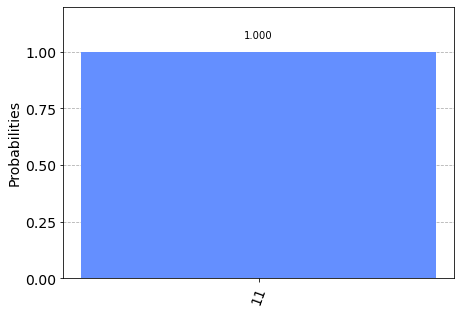

In [41]:
simulador = BasicAer.get_backend('qasm_simulator')
job = execute(circuito, simulador, shots=8024)
resultado = job.result()
contagem = resultado.get_counts()
plot_histogram(contagem)